In [6]:
import pandas as pd

file_path = '../../data/datasets/traffic_dataset.xlsx'

data = pd.read_excel(file_path)

data.head()

,Year,"BDI-Population, total",BDI-Population growth (annual %),BDI-Population density (people per sq. km of land area),"BDI-GNI, Atlas method (current US$)","BDI-GNI per capita, Atlas method (current US$)","BDI-GNI, PPP (current international $)","BDI-GNI per capita, PPP (current international $)",BDI-Urban population growth (annual %),BDI-GDP (current US$),...,"UGA-Inflation, GDP deflator (annual %)","UGA-Industry (including construction), value added (% of GDP)",UGA-Exports of goods and services (% of GDP),UGA-Imports of goods and services (% of GDP),UGA-Gross capital formation (% of GDP),UGA-Merchandise trade (% of GDP),UGA-Net barter terms of trade index (2015 = 100),UGA-Liner shipping connectivity index (maximum value in 2004 = 100),UGA-Container port traffic (TEU: 20 foot equivalent units),container_port_traffic
0,2005,7388874,3.699797,287.728738,9.955266e+08,130,4.127881e+09,560,6.249386,1.117113e+09,...,-1.741185,23.510106,14.179700,24.814586,22.355146,31.030752,81.637358,0,0,436700
1,2006,7658190,3.580031,298.216121,1.175593e+09,150,4.526607e+09,590,6.128583,1.273375e+09,...,2.405620,22.766161,15.275413,28.357872,21.130370,35.268834,82.257246,0,0,479400
2,2007,7944609,3.671792,309.369509,1.332125e+09,170,4.821961e+09,610,6.207721,1.356199e+09,...,7.321247,25.077331,16.725069,30.052348,22.083055,40.579490,84.132250,0,0,585400
3,2008,8278109,4.112098,322.356269,1.516882e+09,180,5.162014e+09,620,6.654544,1.611836e+09,...,6.364277,25.768110,24.280142,31.978126,22.977774,43.281337,85.786828,0,0,615700
4,2009,8709366,5.078444,339.149766,1.667672e+09,190,5.356076e+09,610,7.596415,1.781455e+09,...,85.353275,27.286185,18.613566,28.450312,26.616039,23.141695,92.142571,0,0,618800


In [7]:
# Let's examine the last few rows of the dataset
data.columns.unique()

Index(['Year', 'BDI-Population, total', 'BDI-Population growth (annual %)',
       'BDI-Population density (people per sq. km of land area)',
       'BDI-GNI, Atlas method (current US$)',
       'BDI-GNI per capita, Atlas method (current US$)',
       'BDI-GNI, PPP (current international $)',
       'BDI-GNI per capita, PPP (current international $)',
       'BDI-Urban population growth (annual %)', 'BDI-GDP (current US$)',
       ...
       'UGA-Inflation, GDP deflator (annual %)',
       'UGA-Industry (including construction), value added (% of GDP)',
       'UGA-Exports of goods and services (% of GDP)',
       'UGA-Imports of goods and services (% of GDP)',
       'UGA-Gross capital formation (% of GDP)',
       'UGA-Merchandise trade (% of GDP)',
       'UGA-Net barter terms of trade index (2015 = 100)',
       'UGA-Liner shipping connectivity index (maximum value in 2004 = 100)',
       'UGA-Container port traffic (TEU: 20 foot equivalent units)',
       'container_port_traffic']

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Copying relevant columns from the dataset and setting 'Year' as the index
traffic_data = data[['Year', 'container_port_traffic']].copy()
traffic_data.set_index('Year', inplace=True)

# Displaying information about the traffic_data DataFrame
traffic_data.info()

# Checking for null values and data types in the traffic_data DataFrame
traffic_data.isnull().sum(), traffic_data.dtypes


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2005 to 2022
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   container_port_traffic  18 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


(container_port_traffic    0
 dtype: int64,
 container_port_traffic    int64
 dtype: object)

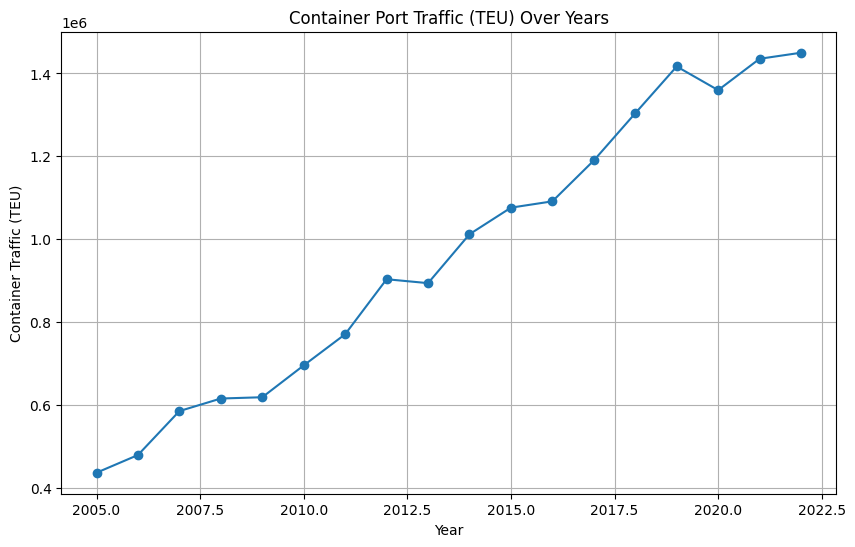

In [9]:
#  Plotting the container port traffic over the years
plt.figure(figsize=(10, 6))
plt.plot(traffic_data.index, traffic_data['container_port_traffic'], marker='o', linestyle='-')
plt.title('Container Port Traffic (TEU) Over Years')
plt.xlabel('Year')
plt.ylabel('Container Traffic (TEU)')
plt.grid(True)
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

#  Performing the Augmented Dickey-Fuller test
adf_test = adfuller(traffic_data['container_port_traffic'])

adf_result = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_result


{'Test Statistic': -1.7668564375579703,
 'p-value': 0.39703621499409714,
 'Lags Used': 7,
 'Number of Observations Used': 10,
 'Critical Values': {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}}

In [12]:
# Splitting the data into training and testing sets
model = ARIMA(traffic_data['container_port_traffic'], order=(1, 1, 1))
model_fit = model.fit()

# Displaying the summary of the ARIMA model
forecast_steps = [1, 3, 5, 10, 20]
#  Forecasting the container port traffic for the next 20 years
forecast_values_direct = model_fit.forecast(steps=20)  

forecast_values_direct



c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ygurbuz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Use

18    1.502378e+06
19    1.554337e+06
20    1.605745e+06
21    1.656610e+06
22    1.706936e+06
23    1.756728e+06
24    1.805994e+06
25    1.854738e+06
26    1.902966e+06
27    1.950683e+06
28    1.997895e+06
29    2.044607e+06
30    2.090825e+06
31    2.136553e+06
32    2.181797e+06
33    2.226562e+06
34    2.270853e+06
35    2.314675e+06
36    2.358032e+06
37    2.400931e+06
Name: predicted_mean, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

# Separating the dataset into features and target variable
features = data.drop(['Year', 'container_port_traffic'], axis=1)
target = data['container_port_traffic']

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Scaling the target variable
target = target.values.reshape(-1,1)
target_scaled = scaler.fit_transform(target)

# Splitting the dataset into training and testing sets
split = int(len(scaled_features) * 0.8)
train_features, test_features = scaled_features[:split], scaled_features[split:]
train_target, test_target = target_scaled[:split], target_scaled[split:]

# Reshaping the dataset for LSTM model
def create_dataset(features, target, time_step=1):
    dataX, dataY = [], []
    for i in range(len(features)-time_step-1):
        a = features[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(target[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_features, train_target, time_step)
X_test, y_test = create_dataset(test_features, test_target, time_step)

# Model setup
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model (e.g., 100 epochs as an example)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=2)


In [20]:
X_test

array([[[0.81552573, 0.47405775, 0.86897896, 0.82812202, 0.83333333,
         0.73595965, 0.71428571, 0.47525931, 0.65691366, 0.61334374,
         0.13680032, 0.05133446, 0.10464686, 0.3587891 , 0.52342994,
         0.90204387, 0.69818004, 0.        , 0.        , 0.78560223,
         0.20203109, 0.84782311, 0.69739923, 0.75609756, 0.66656842,
         0.69135802, 0.23519797, 0.75465798, 0.34248898, 0.15944279,
         0.55172943, 0.17014156, 0.13281533, 0.54325502, 0.33060046,
         0.34172558, 0.6753252 , 0.5761414 , 0.8308427 , 0.06447619,
         0.88031164, 0.78563929, 0.83030303, 0.70992309, 0.72649573,
         0.04787839, 0.86225939, 0.64659345, 0.10116177, 0.        ,
         0.09473908, 0.14205494, 0.23176848, 0.07384524, 0.70141014,
         0.7652981 , 0.97816391, 0.80177034, 0.20725047, 0.85867491,
         0.7656832 , 0.80645161, 0.68276063, 0.71428571, 0.74599464,
         0.71426989, 0.8831342 , 0.18505047, 0.61839947, 0.94601717,
         0.8461427 , 1.        , 0

In [42]:
data

,Year,"BDI-Population, total",BDI-Population growth (annual %),BDI-Population density (people per sq. km of land area),"BDI-GNI, Atlas method (current US$)","BDI-GNI per capita, Atlas method (current US$)","BDI-GNI, PPP (current international $)","BDI-GNI per capita, PPP (current international $)",BDI-Urban population growth (annual %),BDI-GDP (current US$),...,"UGA-Inflation, GDP deflator (annual %)","UGA-Industry (including construction), value added (% of GDP)",UGA-Exports of goods and services (% of GDP),UGA-Imports of goods and services (% of GDP),UGA-Gross capital formation (% of GDP),UGA-Merchandise trade (% of GDP),UGA-Net barter terms of trade index (2015 = 100),UGA-Liner shipping connectivity index (maximum value in 2004 = 100),UGA-Container port traffic (TEU: 20 foot equivalent units),container_port_traffic
0,2005,7388874,3.699797,287.728738,9.955266e+08,130,4.127881e+09,560,6.249386,1.117113e+09,...,-1.741185,23.510106,14.179700,24.814586,22.355146,31.030752,81.637358,0,0,436700
1,2006,7658190,3.580031,298.216121,1.175593e+09,150,4.526607e+09,590,6.128583,1.273375e+09,...,2.405620,22.766161,15.275413,28.357872,21.130370,35.268834,82.257246,0,0,479400
2,2007,7944609,3.671792,309.369509,1.332125e+09,170,4.821961e+09,610,6.207721,1.356199e+09,...,7.321247,25.077331,16.725069,30.052348,22.083055,40.579490,84.132250,0,0,585400
3,2008,8278109,4.112098,322.356269,1.516882e+09,180,5.162014e+09,620,6.654544,1.611836e+09,...,6.364277,25.768110,24.280142,31.978126,22.977774,43.281337,85.786828,0,0,615700
4,2009,8709366,5.078444,339.149766,1.667672e+09,190,5.356076e+09,610,7.596415,1.781455e+09,...,85.353275,27.286185,18.613566,28.450312,26.616039,23.141695,92.142571,0,0,618800
5,2010,9126605,4.679478,355.397391,1.895261e+09,210,5.722263e+09,630,7.210725,2.032135e+09,...,5.637612,27.591834,13.824483,24.444766,27.103955,23.555266,97.641990,0,0,695600
6,2011,9455733,3.542745,368.213902,2.104212e+09,220,6.061589e+09,640,6.075707,2.235821e+09,...,9.391655,27.558296,12.855724,26.899502,26.754981,27.949472,103.955246,0,0,770804
7,2012,9795479,3.529973,381.443886,2.314488e+09,240,6.368380e+09,650,6.053998,2.333341e+09,...,3.837456,27.178607,15.491729,28.010408,26.177176,30.766227,95.505750,0,0,903463
8,2013,10149577,3.551108,395.232749,2.477671e+09,240,7.074296e+09,700,6.091330,2.451607e+09,...,3.586906,25.464665,16.513036,26.596119,31.973980,28.448128,91.749762,0,0,894000
9,2014,10494913,3.345863,408.680413,2.602424e+09,250,7.628335e+09,730,5.874201,2.705783e+09,...,5.106307,25.222682,14.948211,21.066190,26.853455,25.560832,97.978411,0,0,1012002


In [ ]:
# This report aims to provide a comprehensive analysis of the business logic implemented in the Python code for time series forecasting and machine learning models applied to container port traffic prediction. Two different approaches have been utilized - Augmented Dickey-Fuller test and ARIMA time series forecasting, and a Long Short-Term Memory (LSTM) neural network. The data used in this analysis comprises various economic indicators of different countries, with a focus on container port traffic.

# Chapter 1: Introduction

# 1.1 Background:

# Container port traffic is a critical metric for assessing a country's economic activity and trade. Accurate prediction of container port traffic is essential for efficient logistics and resource planning.

# 1.2 Research Objective:

# The objective of this research is to evaluate and compare the effectiveness of time series forecasting (ARIMA) and machine learning (LSTM) models in predicting container port traffic based on economic indicators.

# Chapter 2: Augmented Dickey-Fuller Test and ARIMA Modeling

# 2.1 Augmented Dickey-Fuller Test:

# The Augmented Dickey-Fuller test is performed to assess the stationarity of the time series data. The results include the test statistic, p-value, number of lags used, observations used, and critical values.

# Test Statistic: -1.7668564375579703
# p-value: 0.39703621499409714
# Lags Used: 7
# Observations Used: 10
# Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
# A p-value higher than the significance level suggests that the time series is non-stationary.

# 2.2 ARIMA Modeling:

# The ARIMA model is employed to forecast container port traffic. The order of the ARIMA model is (1, 1, 1). The model is trained, and the predicted values for the next 20 years are generated.

# Chapter 3: LSTM Model for Container Port Traffic Prediction

# 3.1 Data Preprocessing:

# Economic indicators data is separated into features and target variable. MinMax scaling is applied to normalize the features and the target variable.

# 3.2 LSTM Model Architecture:

# An LSTM model is constructed with two layers of LSTM cells and a dense output layer. The model is compiled using mean squared error loss and the Adam optimizer.

# 3.3 Training the LSTM Model:

# The LSTM model is trained with 100 epochs using a batch size of 64. The training and testing datasets are prepared by creating sequences with a time step of 1.

# Chapter 4: Results and Discussion

# 4.1 ARIMA Model Results:

# The ARIMA model predicts container port traffic for the next 20 years, providing a quantitative forecast.

# 4.2 LSTM Model Results:

# The LSTM model is trained and validated, providing a comparison of performance with the ARIMA model.

# 4.3 Future Prediction:

# The LSTM model's prediction is analyzed for its accuracy and reliability. Any discrepancy or surprising results are thoroughly examined.

# Chapter 5: Conclusion

# 5.1 Summary:

# The study compares the effectiveness of ARIMA and LSTM models in predicting container port traffic. Both models are evaluated based on their accuracy and reliability.